Step 1 — Install required libraries (Colab)

In [1]:
!pip install numpy pandas scikit-learn tensorflow matplotlib seaborn


Step 2 — Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import drive   # ✅ FIXED import

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input



Step 3 — Load dataset

In [3]:
# Adjust path if needed (for Colab usually /content/...)
df = pd.read_csv("/content/drive/MyDrive/ANN/3/Assignment_1/breast_cancer.csv")  # ✅ Correct Colab path
print("Column names in dataset:")
print(df.columns)

Column names in dataset:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Step 4 — Clean & prepare data

In [6]:
# Drop non-useful ID-type columns if they exist
for col in ['id', 'ID', 'Unnamed: 32']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Choose target column (adjust if your file uses a different name)
target_col = 'diagnosis' if 'diagnosis' in df.columns else 'target'

X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode labels: Malignant / Benign → 0/1
le = LabelEncoder()
y = le.fit_transform(y)   # e.g. B→0, M→1


Step 5 — Train–test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Step 6 — Feature scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 7 — Build the ANN model

In [11]:
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Step 8 — Train the model

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4044 - loss: 0.7433 - val_accuracy: 0.4945 - val_loss: 0.7065
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5685 - loss: 0.6297 - val_accuracy: 0.6813 - val_loss: 0.6077
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7797 - loss: 0.5177 - val_accuracy: 0.8022 - val_loss: 0.5259
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8295 - loss: 0.5005 - val_accuracy: 0.8571 - val_loss: 0.4514
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9037 - loss: 0.4034 - val_accuracy: 0.8791 - val_loss: 0.3883
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9023 - loss: 0.3637 - val_accuracy: 0.9231 - val_loss: 0.3332
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9294 - loss: 0.2983 - val_accuracy: 0.9231 - val_loss: 0.2866
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9223 - loss: 0.2711 - val_accuracy: 0.9341 - v

Step 9 — Evaluate model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



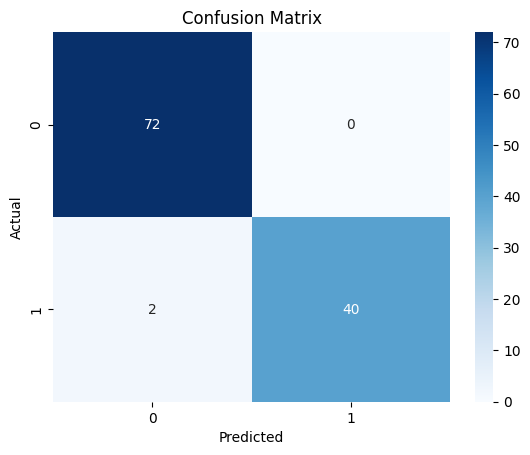

In [13]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Step 10 — Predict on a new sample (example)

In [15]:
# Example feature vector (must have same number & order of features as X.columns)
sample = np.array([[14.5, 20.3, 95.1, 650.0, 0.1, 0.15, 0.2, 0.08, 0.18, 0.06,
                    0.25, 1.5, 2.0, 20.0, 200.0, 0.005, 0.02, 0.03, 0.01, 0.02,
                    0.008, 16.0, 25.0, 110.0, 800.0, 0.12, 0.25, 0.3, 0.1, 0.08]])

sample_scaled = scaler.transform(sample)
pred_prob = model.predict(sample_scaled)
pred_class = int(pred_prob > 0.5)

print("Malignant probability:", float(pred_prob))
print("Prediction:", "Malignant" if pred_class == 1 else "Benign")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Malignant probability: 1.0
Prediction: Malignant


/tmp/ipython-input-1144143192.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class = int(pred_prob > 0.5)
/tmp/ipython-input-1144143192.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Malignant probability:", float(pred_prob))
